# **Exploratory** data analysis

In [ ]:
'''# Function to generate bar charts for top 20 names in a given column ('cast' or 'director'), separated by type
def generate_bar_chart_by_country_and_type(df, column_name, top_n=20):
    for content_type in df['type'].unique():
        # Filter data for the specific type
        type_df = df[df['type'] == content_type]

        for country in type_df['country'].unique():
            # Filter data for the specific country within the type
            country_data = type_df[type_df['country'] == country]

            # Extract and count names from the specified column
            names = [name.strip() for sublist in country_data[column_name].str.split(', ') for name in sublist if name.strip()]
            name_counts = Counter(names)

            # Get the top N most frequent names
            top_names = name_counts.most_common(top_n)

            # Prepare data for plotting
            names, counts = zip(*top_names)

            # Create the bar chart
            plt.figure(figsize=(12, 6))
            plt.bar(names, counts)

            # Set labels and title
            plt.xlabel(f'{column_name.capitalize()}')
            plt.ylabel('Count')
            plt.title(f'Top {top_n} {column_name.capitalize()} in {country} ({content_type})')

            # Rotate x-axis labels for better readability
            plt.xticks(rotation=45)

            # Show the plot
            plt.tight_layout()
            plt.show()

# Generate bar charts for top 20 'cast' and 'director', separated by 'type'
generate_bar_chart_by_country_and_type(df, 'cast')
generate_bar_chart_by_country_and_type(df, 'director')'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"# Function to generate bar charts for top 20 names in a given column ('cast' or 'director'), separated by type\ndef generate_bar_chart_by_country_and_type(df, column_name, top_n=20):\n    for content_type in df['type'].unique():\n        # Filter data for the specific type\n        type_df = df[df['type'] == content_type]\n\n        for country in type_df['country'].unique():\n            # Filter data for the specific country within the type\n            country_data = type_df[type_df['country'] == country]\n\n            # Extract and count names from the specified column\n            names = [name.strip() for sublist in country_data[column_name].str.split(', ') for name in sublist if name.strip()]\n            name_counts = Counter(names)\n\n            # Get the top N most frequent names\n            top_names = name_counts.most_common(top_n)\n\n            # Prepare data for plotting\n            names, counts = zip(*top_names)\n\n            # Create the bar chart\n            p

In [ ]:
# Convert 'date_added' to datetime without modifying the original DataFrame
date_added_datetime = pd.to_datetime(df['date_added'])

# Extract year and month into separate Series
year_added = date_added_datetime.dt.year
month_added = date_added_datetime.dt.month_name().tolist()  # Convert to list for compatibility

# Create a new DataFrame with the extracted information
prepared_df = pd.DataFrame({
    'original_date_added': df['date_added'],
    'year_added': year_added,
    'month_added': month_added
})

# Display the first few rows of the prepared DataFrame
print(prepared_df.head().to_string(index=False))

original_date_added  year_added month_added
         2020-08-14        2020      August
         2016-12-23        2016    December
         2018-12-20        2018    December
         2017-11-16        2017    November
         2020-01-01        2020     January


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


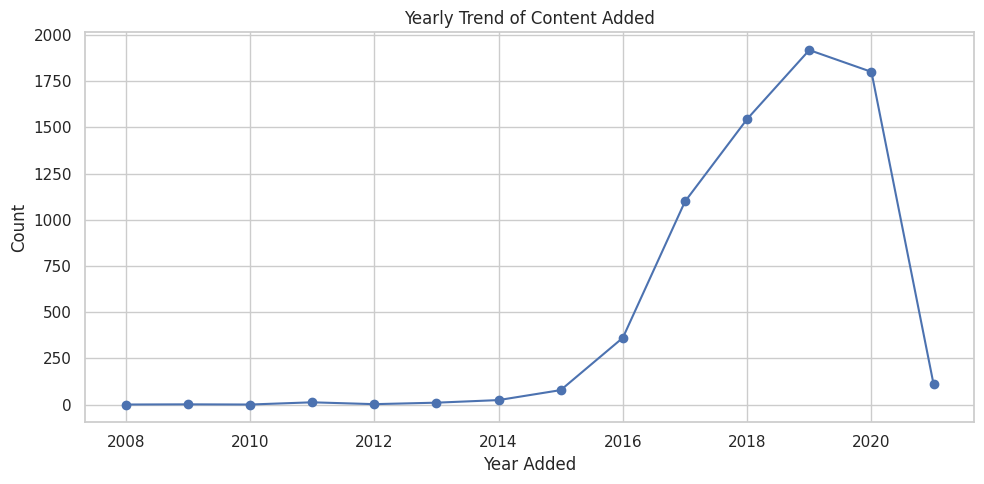

In [ ]:
# Count the number of content added each year
yearly_counts = prepared_df['year_added'].value_counts().sort_index()

# Create the line chart for yearly trend
plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Yearly Trend of Content Added')

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


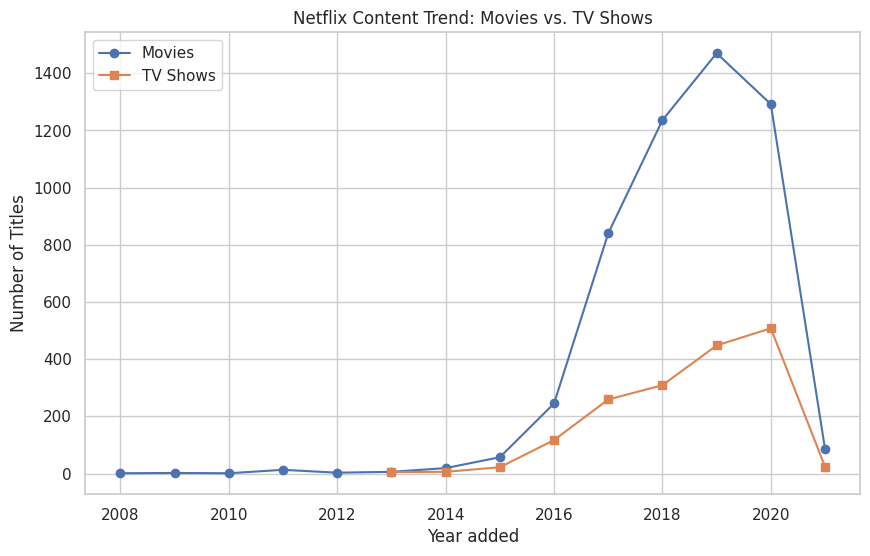

In [ ]:
# Convert 'date_added' to datetime format with the correct format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors = 'coerce') # Added errors = 'coerce' to handle potential errors in date format

# Extract the year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by 'type' and 'year' and count the entries
content_counts = df.groupby(['type', 'year_added']).size().reset_index(name='count')

# Separate Movies and TV Shows
movies_counts = content_counts[content_counts['type'] == 'Movie']
tv_shows_counts = content_counts[content_counts['type'] == 'TV Show']

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(movies_counts['year_added'], movies_counts['count'], label='Movies', marker='o')
plt.plot(tv_shows_counts['year_added'], tv_shows_counts['count'], label='TV Shows', marker='s')
plt.xlabel('Year added')
plt.ylabel('Number of Titles')
plt.title('Netflix Content Trend: Movies vs. TV Shows')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


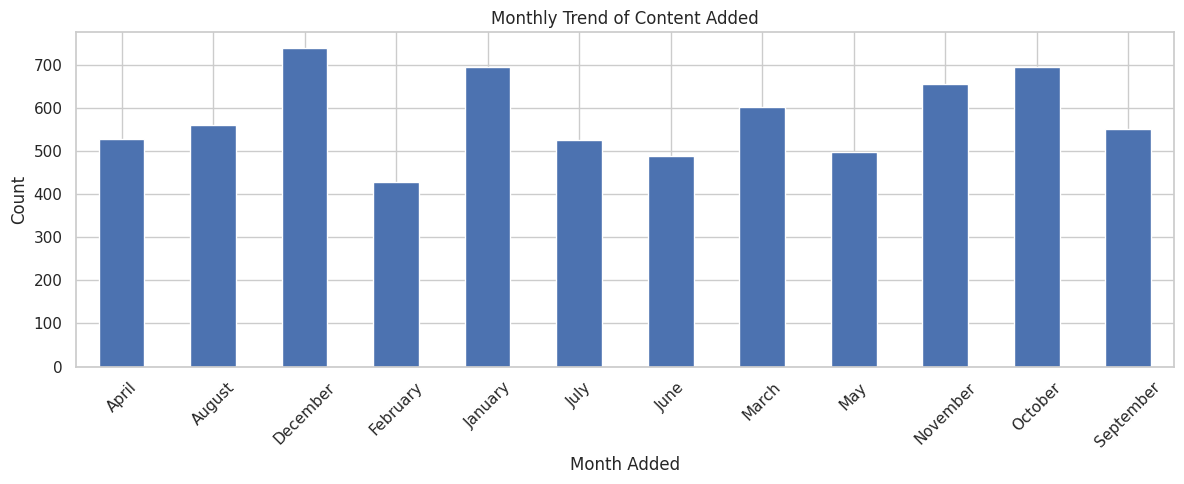

In [ ]:
'''# Count the number of content added each year
yearly_counts = prepared_df['year_added'].value_counts().sort_index()

# Create the line chart for yearly trend
plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Yearly Trend of Content Added')

# Show the plot
plt.tight_layout()
plt.show()
'''
# Monthly Trend

# Count the number of content added each month
monthly_counts = prepared_df['month_added'].value_counts().sort_index()

# Create the bar chart for monthly trend
plt.figure(figsize=(12, 5))
monthly_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Monthly Trend of Content Added')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


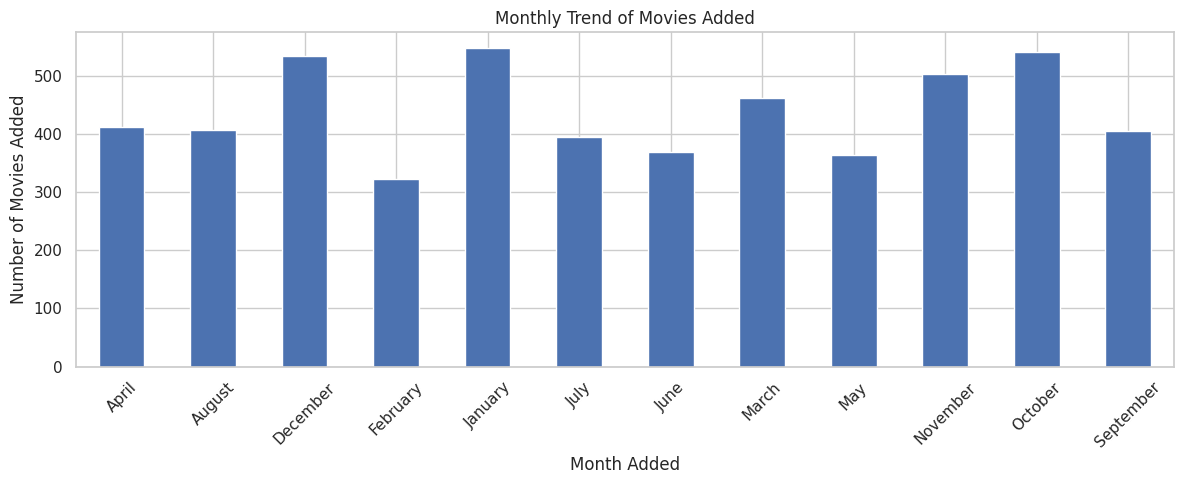

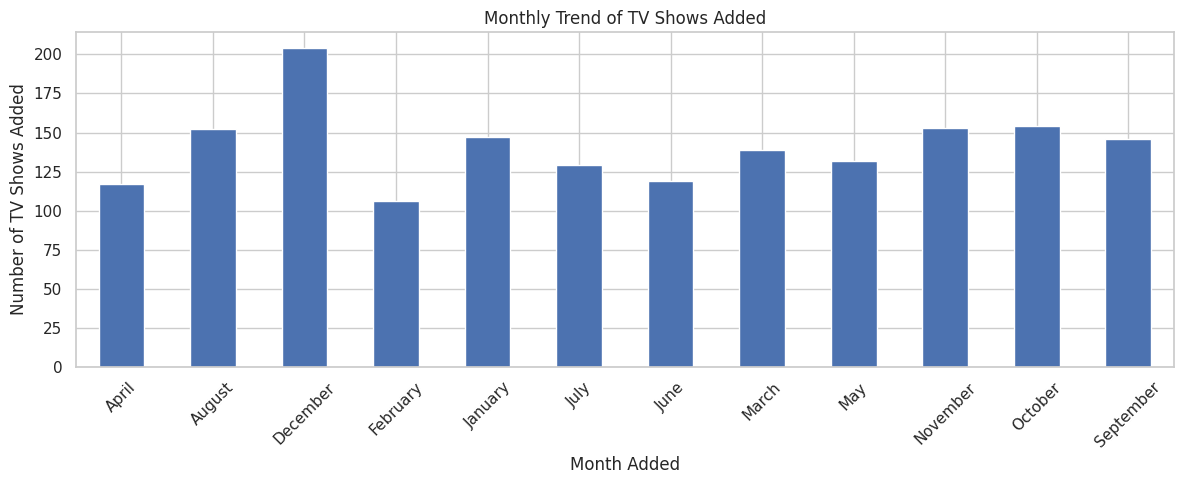

In [ ]:
# Filter data for movies and TV shows
movies_prepared_df = prepared_df[df['type'] == 'Movie']
tv_shows_prepared_df = prepared_df[df['type'] == 'TV Show']

'''# Yearly Trend (Movies)

# Count the number of movies added each year
yearly_movie_counts = movies_prepared_df['year_added'].value_counts().sort_index()

# Create the line chart for yearly movie trend
plt.figure(figsize=(10, 5))
yearly_movie_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Number of Movies Added')
plt.title('Yearly Trend of Movies Added')

# Show the plot
plt.tight_layout()
plt.show()

# Yearly Trend (TV Shows)

# Count the number of TV shows added each year
yearly_tv_show_counts = tv_shows_prepared_df['year_added'].value_counts().sort_index()

# Create the line chart for yearly TV show trend
plt.figure(figsize=(10, 5))
yearly_tv_show_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Number of TV Shows Added')
plt.title('Yearly Trend of TV Shows Added')

# Show the plot
plt.tight_layout()
plt.show()
'''
# Monthly Trend (Movies)

# Count the number of movies added each month
monthly_movie_counts = movies_prepared_df['month_added'].value_counts().sort_index()

# Create the bar chart for monthly movie trend
plt.figure(figsize=(12, 5))
monthly_movie_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Month Added')
plt.ylabel('Number of Movies Added')
plt.title('Monthly Trend of Movies Added')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Monthly Trend (TV Shows)

# Count the number of TV shows added each month
monthly_tv_show_counts = tv_shows_prepared_df['month_added'].value_counts().sort_index()

# Create the bar chart for monthly TV show trend
plt.figure(figsize=(12, 5))
monthly_tv_show_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Month Added')
plt.ylabel('Number of TV Shows Added')
plt.title('Monthly Trend of TV Shows Added')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1000x500 with 0 Axes>

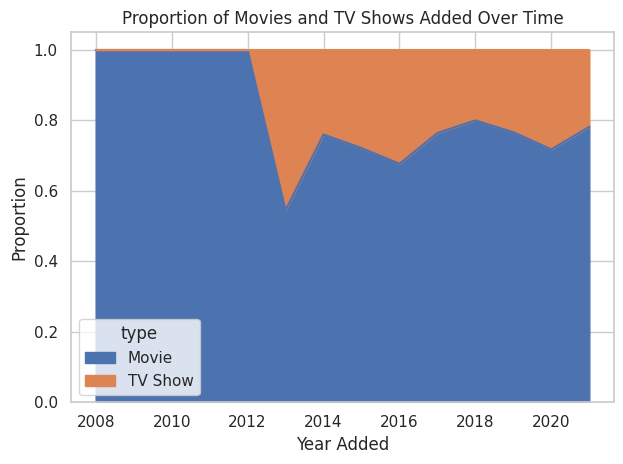

In [ ]:
# Count the number of movies and TV shows added each year, using 'type' from the original df
yearly_type_counts = prepared_df.groupby(['year_added', df['type']]).size().unstack(fill_value=0)

# Calculate the proportion of each type for each year
yearly_type_proportions = yearly_type_counts.div(yearly_type_counts.sum(axis=1), axis=0)

# Create the stacked area chart
plt.figure(figsize=(10, 5))
yearly_type_proportions.plot(kind='area', stacked=True)

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Proportion')
plt.title('Proportion of Movies and TV Shows Added Over Time')

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-165-71ef33bd20bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_prepared_df['time_lag'] = movies_prepared_df['year_added'] - df[df['type'] == 'Movie']['release_year']
<ipython-input-165-71ef33bd20bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

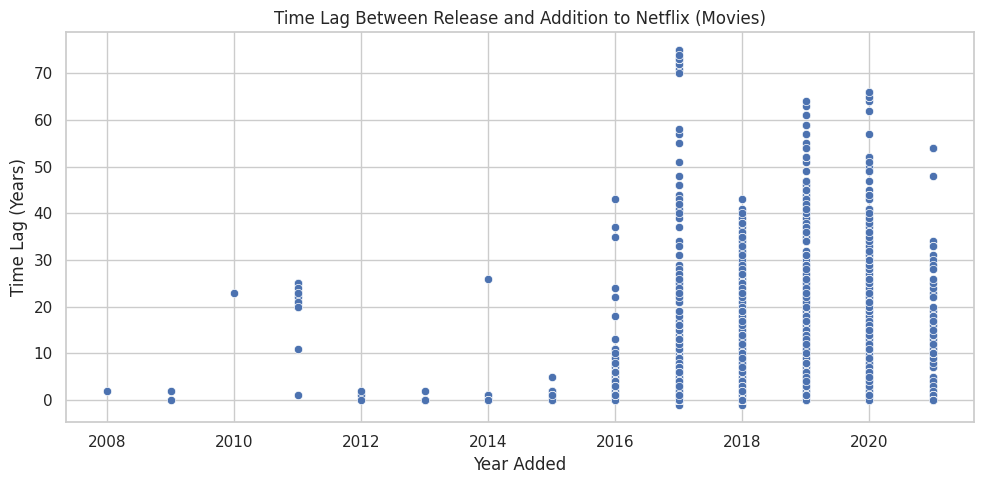

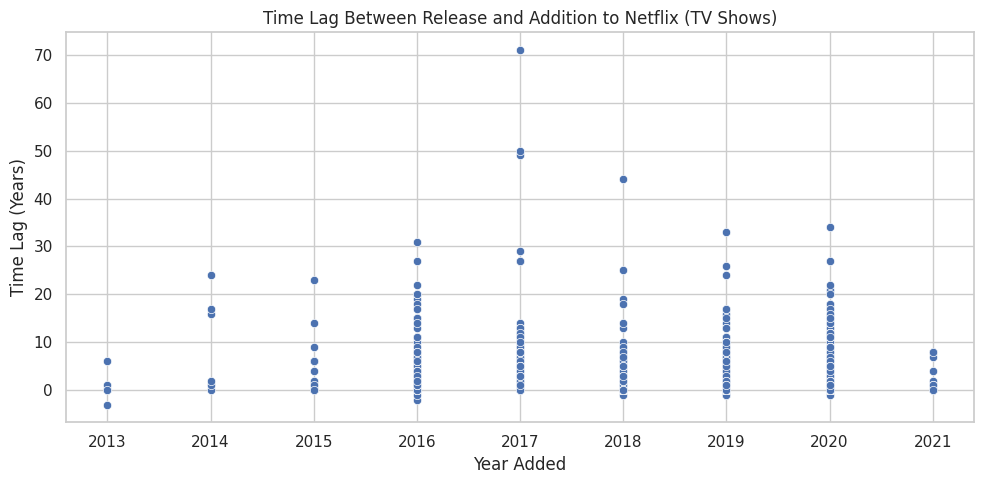

In [ ]:
# Filter data for movies and TV shows
movies_prepared_df = prepared_df[df['type'] == 'Movie']
tv_shows_prepared_df = prepared_df[df['type'] == 'TV Show']

# Calculate the time lag between release year and year added for movies
movies_prepared_df['time_lag'] = movies_prepared_df['year_added'] - df[df['type'] == 'Movie']['release_year']

# Calculate the time lag between release year and year added for TV shows
tv_shows_prepared_df['time_lag'] = tv_shows_prepared_df['year_added'] - df[df['type'] == 'TV Show']['release_year']

# Create separate scatter plots for movies and TV shows
for content_type, type_df in zip(['Movies', 'TV Shows'], [movies_prepared_df, tv_shows_prepared_df]):
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x='year_added', y='time_lag', data=type_df)

  # Set labels and title
  plt.xlabel('Year Added')
  plt.ylabel('Time Lag (Years)')
  plt.title(f'Time Lag Between Release and Addition to Netflix ({content_type})')

  # Show the plot
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


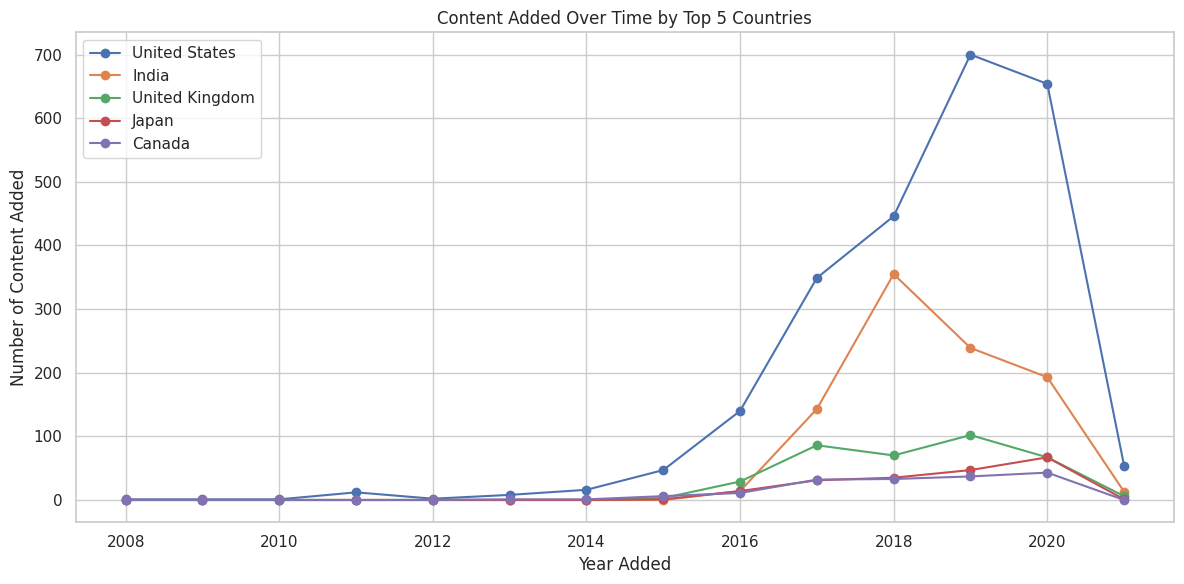

In [ ]:
# Count the number of content added each year for each country, using 'country' from the original df
yearly_country_counts = prepared_df.groupby(['year_added', df['country']]).size().unstack(fill_value=0)

# Get the top 5 countries based on total content count
top_5_countries = yearly_country_counts.sum().nlargest(5).index

# Filter the data to include only the top 5 countries
filtered_yearly_country_counts = yearly_country_counts[top_5_countries]

# Create the line chart for each of the top 5 countries
plt.figure(figsize=(12, 6))
for country in filtered_yearly_country_counts.columns:
    filtered_yearly_country_counts[country].plot(kind='line', marker='o', label=country)

# Set labels and title
plt.xlabel('Year Added')
plt.ylabel('Number of Content Added')
plt.title('Content Added Over Time by Top 5 Countries')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


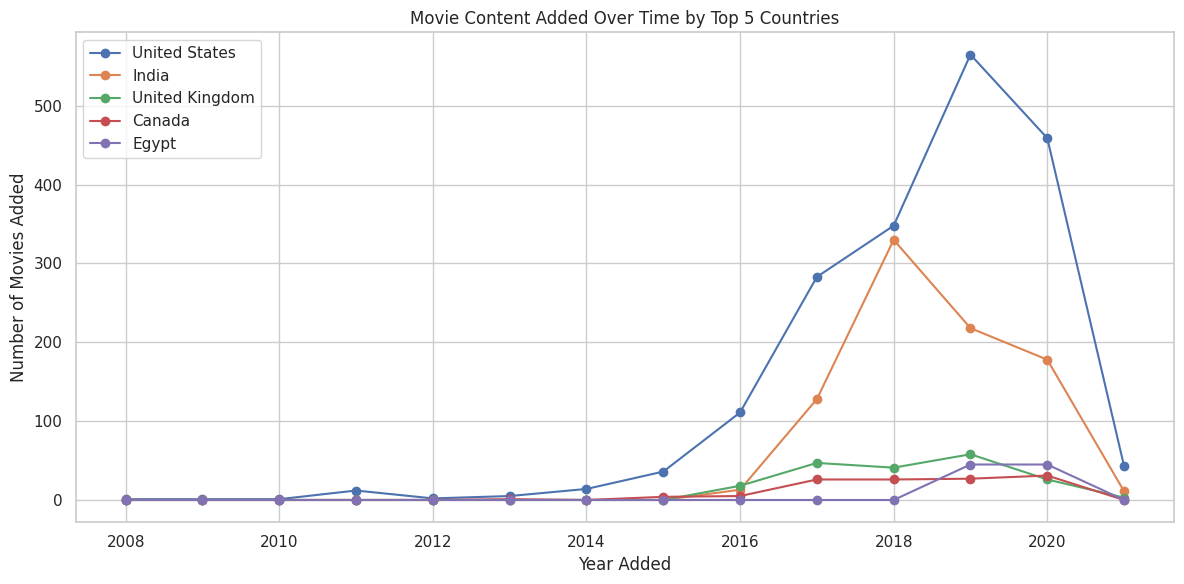

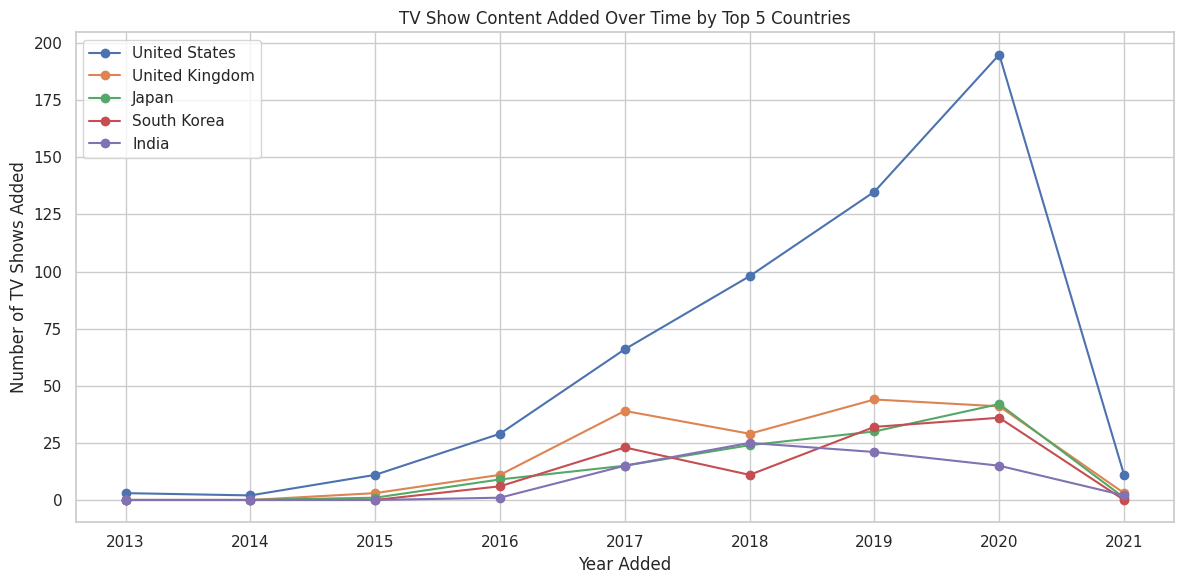

In [ ]:
# Filter the original DataFrame into movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Count for Movies
movie_yearly_counts = movies_df.groupby(['year_added', 'country']).size().unstack(fill_value=0)
top_movie_countries = movie_yearly_counts.sum().nlargest(5).index
filtered_movie_yearly_counts = movie_yearly_counts[top_movie_countries]

# Plot for Movies
plt.figure(figsize=(12, 6))
for country in filtered_movie_yearly_counts.columns:
    filtered_movie_yearly_counts[country].plot(kind='line', marker='o', label=country)
plt.xlabel('Year Added')
plt.ylabel('Number of Movies Added')
plt.title('Movie Content Added Over Time by Top 5 Countries')
plt.legend()
plt.tight_layout()
plt.show()

# Count for TV Shows
tv_show_yearly_counts = tv_shows_df.groupby(['year_added', 'country']).size().unstack(fill_value=0)
top_tv_show_countries = tv_show_yearly_counts.sum().nlargest(5).index
filtered_tv_show_yearly_counts = tv_show_yearly_counts[top_tv_show_countries]

# Plot for TV Shows
plt.figure(figsize=(12, 6))
for country in filtered_tv_show_yearly_counts.columns:
    filtered_tv_show_yearly_counts[country].plot(kind='line', marker='o', label=country)
plt.xlabel('Year Added')
plt.ylabel('Number of TV Shows Added')
plt.title('TV Show Content Added Over Time by Top 5 Countries')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


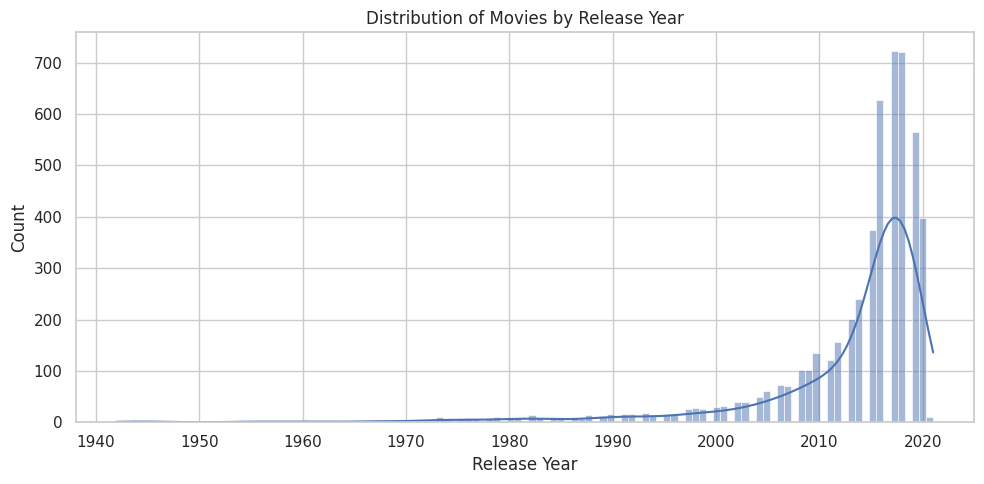

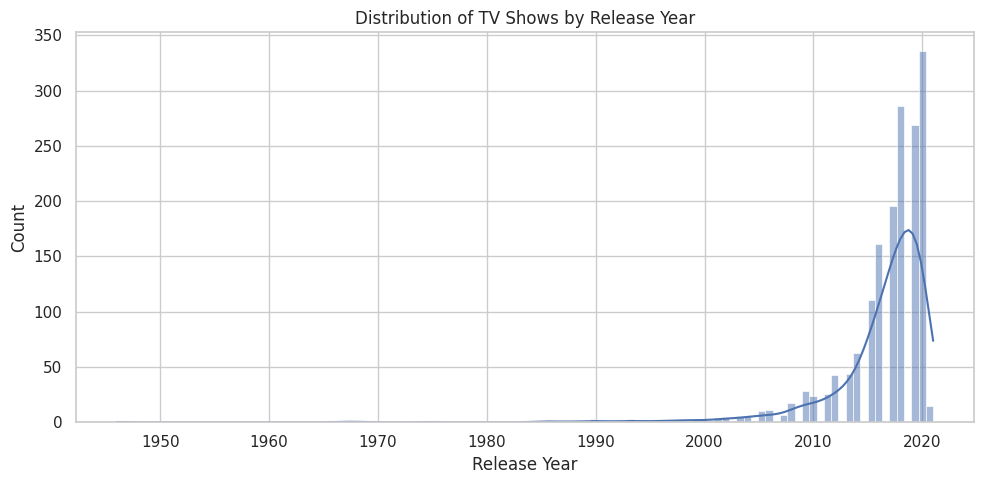

In [ ]:
# Filter data for movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Create histograms for movies and TV shows
for content_type, type_df in zip(['Movies', 'TV Shows'], [movies_df, tv_shows_df]):
    plt.figure(figsize=(10, 5))
    sns.histplot(type_df['release_year'], kde=True)  # kde adds a density curve for smoother visualization

    # Set labels and title
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.title(f'Distribution of {content_type} by Release Year')

    # Show the plot
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


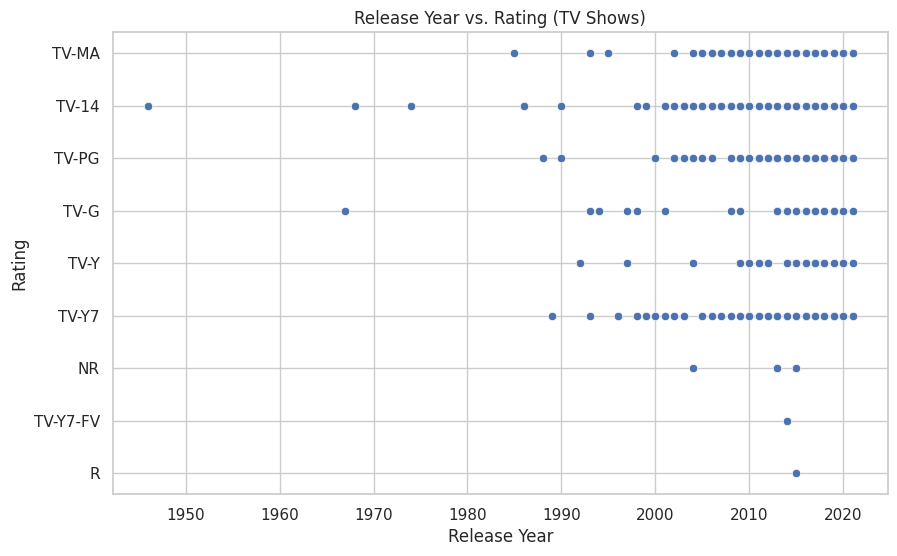

<ipython-input-169-2040b12d01d6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['rating_numeric'] = tv_shows['rating'].map(rating_mapping)


Correlation between release year and rating (TV Shows): -0.16290483194822222


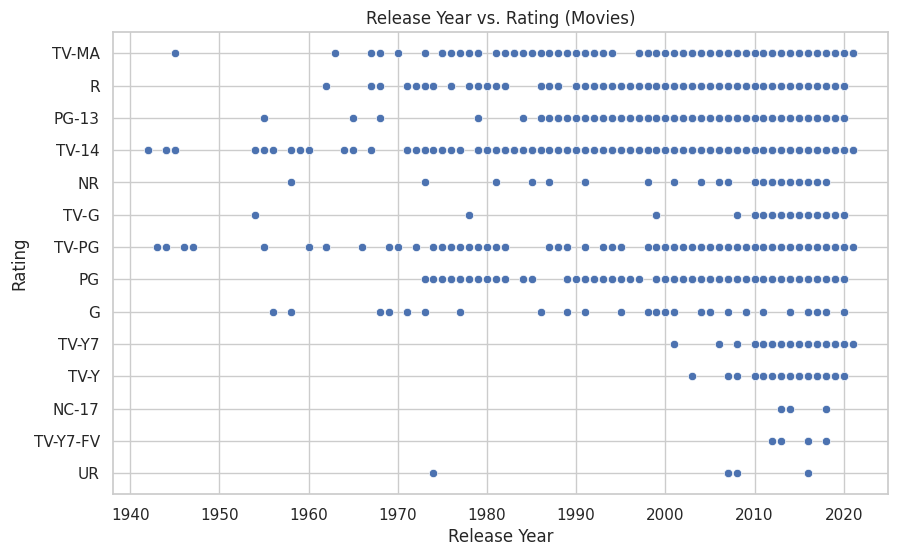

<ipython-input-169-2040b12d01d6>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['rating_numeric'] = movies['rating'].map(rating_mapping)
<ipython-input-169-2040b12d01d6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_numeric'] = tv_shows['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60 if 'Seasons' in x or 'Season' in x else x)


Correlation between release year and rating (Movies): -0.15972161494787532


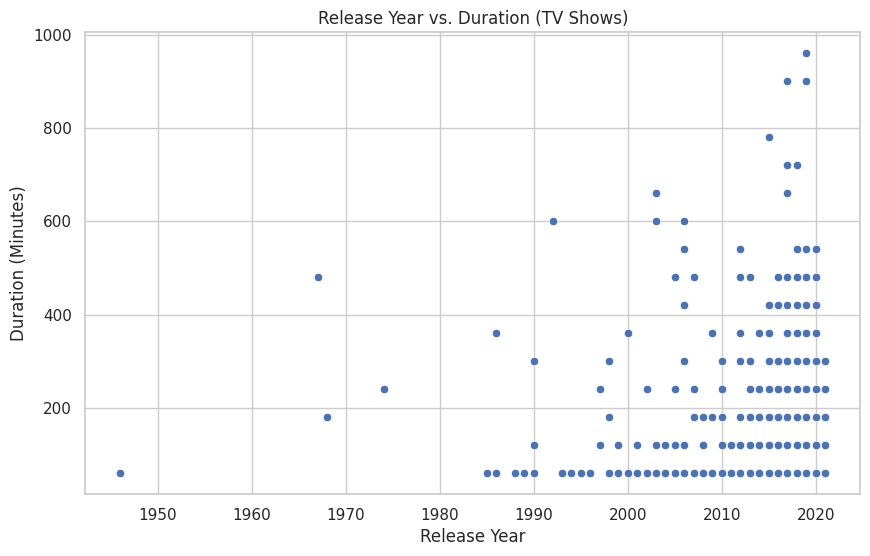

Correlation between release year and duration (TV Shows): -0.0579009403939285


<ipython-input-169-2040b12d01d6>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].apply(convert_to_minutes)
<ipython-input-169-2040b12d01d6>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'].fillna(0, inplace=True)


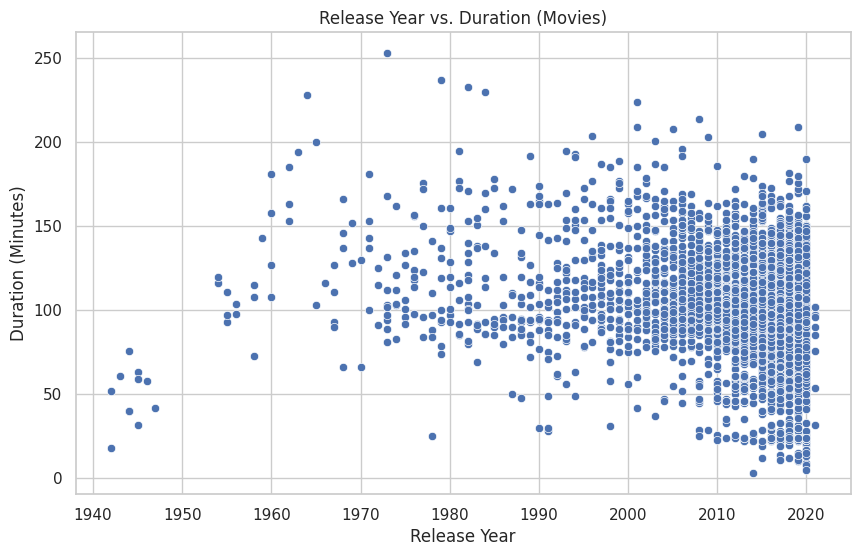

Correlation between release year and duration (Movies): -0.2093365875560706


In [ ]:
# Filter for TV shows and movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Define a mapping for rating categories to numerical values
rating_mapping = {'TV-MA': 1, 'TV-14': 2, 'TV-PG': 3, 'R': 4, 'PG-13': 5,
                  'TV-Y': 6, 'TV-Y7': 7, 'PG': 8, 'TV-G': 9, 'G': 10,
                  'NC-17': 11, 'NR': 12, 'TV-Y7-FV': 13, 'UR': 14}

# 2. Release Year vs. Rating (TV Shows and Movies)

# TV Shows
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='rating', data=tv_shows)
plt.title('Release Year vs. Rating (TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

tv_shows['rating_numeric'] = tv_shows['rating'].map(rating_mapping)
correlation = tv_shows['release_year'].corr(tv_shows['rating_numeric'])
print(f"Correlation between release year and rating (TV Shows): {correlation}")

# Movies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='rating', data=movies)
plt.title('Release Year vs. Rating (Movies)')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

movies['rating_numeric'] = movies['rating'].map(rating_mapping)
correlation = movies['release_year'].corr(movies['rating_numeric'])
print(f"Correlation between release year and rating (Movies): {correlation}")


# 3. Release Year vs. Duration (TV Shows and Movies)

# TV Shows - Assuming duration is in minutes for TV shows
tv_shows['duration_numeric'] = tv_shows['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60 if 'Seasons' in x or 'Season' in x else x)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_numeric', data=tv_shows)
plt.title('Release Year vs. Duration (TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()

correlation = tv_shows['release_year'].corr(tv_shows['duration_numeric'])
print(f"Correlation between release year and duration (TV Shows): {correlation}")

# Movies - Define a function to convert duration to minutes
def convert_to_minutes(duration_str):
    try:
        if 'min' in duration_str:
            return int(duration_str.split()[0])
        else:
            return int(duration_str)
    except ValueError:
        return pd.NA

# Apply the conversion and fill NaN values
movies['duration_minutes'] = movies['duration'].apply(convert_to_minutes)
movies['duration_minutes'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration_minutes', data=movies)
plt.title('Release Year vs. Duration (Movies)')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.show()

correlation = movies['release_year'].corr(movies['duration_minutes'])
print(f"Correlation between release year and duration (Movies): {correlation}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


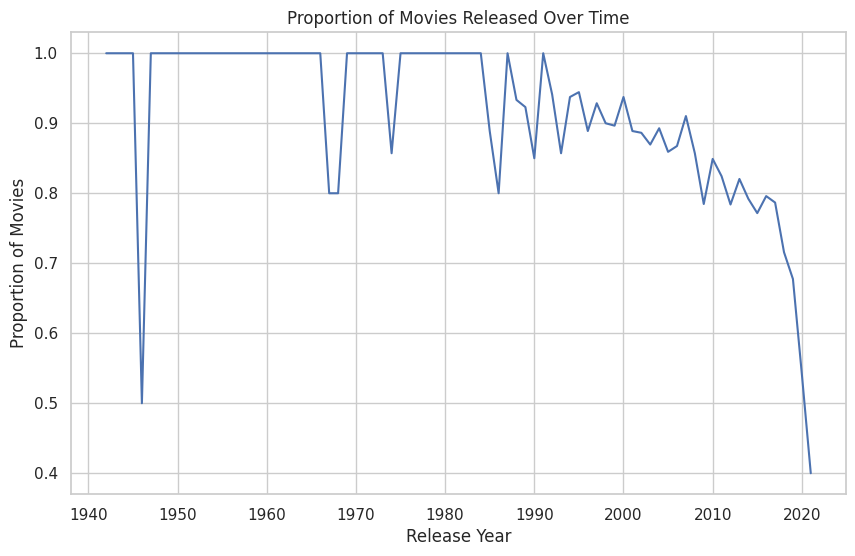

In [ ]:
# Count the number of movies and TV shows for each release year
counts_by_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Calculate the proportion of movies for each year
counts_by_year['movie_proportion'] = counts_by_year['Movie'] / (counts_by_year['Movie'] + counts_by_year['TV Show'])

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=counts_by_year.index, y='movie_proportion', data=counts_by_year)
plt.title('Proportion of Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Proportion of Movies')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1500x800 with 0 Axes>

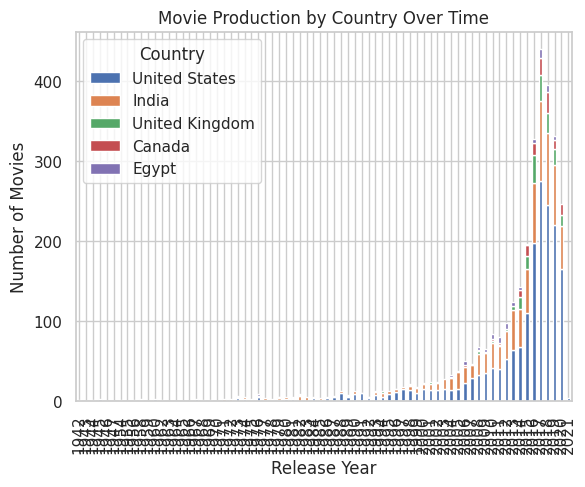

In [ ]:
# Filter for movies only
movies = df[df['type'] == 'Movie']

# Count the number of movies produced by each country per year
movie_counts = movies.groupby(['release_year', 'country']).size().unstack(fill_value=0)

# Select top countries (adjust the number as needed)
top_movie_countries = movie_counts.sum().sort_values(ascending=False).head(5).index

# Filter the data for top countries
movie_counts_top = movie_counts[top_movie_countries]

# Plot the trend for top countries
plt.figure(figsize=(15, 8))
movie_counts_top.plot(kind='bar', stacked=True)
plt.title('Movie Production by Country Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Country')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1800x1200 with 0 Axes>

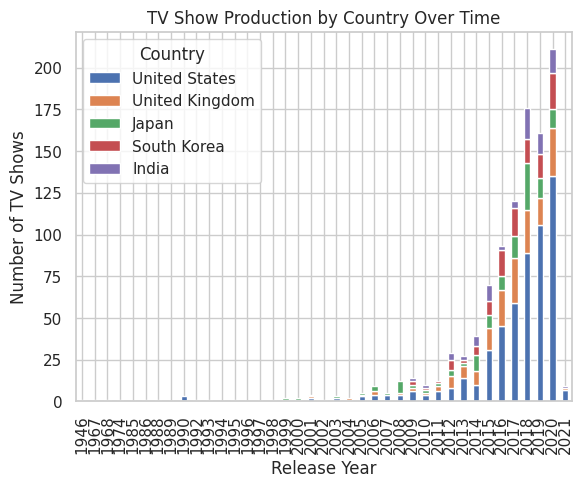

In [ ]:
# Filter for TV shows only
tv_shows = df[df['type'] == 'TV Show']

# Count the number of TV shows produced by each country per year
tv_show_counts = tv_shows.groupby(['release_year', 'country']).size().unstack(fill_value=0)

# Select top countries (adjust the number as needed)
top_tv_show_countries = tv_show_counts.sum().sort_values(ascending=False).head(5).index

# Filter the data for top countries
tv_show_counts_top = tv_show_counts[top_tv_show_countries]

# Plot the trend for top countries
plt.figure(figsize=(18, 12))
tv_show_counts_top.plot(kind='bar', stacked=True)
plt.title('TV Show Production by Country Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.legend(title='Country')
plt.show()